In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt,rc
from matplotlib.animation import FuncAnimation as animate
rc('animation' ,html='html5')
%matplotlib inline

In [ ]:
class Dataset(object):
    def __init__(self) -> None:
        # source : https://cs231n.github.io/neural-networks-case-study/
        N = 100 # number of points per class
        D = 2 # dimensionality
        K = 3 # number of classes
        self.x = np.zeros((N*K,D)) # data matrix (each row = single example)
        self.y = np.zeros(N*K, dtype='uint8') # class labels
        for j in range(K):
            ix = range(N*j,N*(j+1))
            r = np.linspace(0.0,1,N) # radius
            t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
            self.x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            self.y[ix] = j

    @property
    def plot(self):
        plt.scatter(self.x[:,0],self.x[:,1],c=self.y,s=40,cmap=plt.cm.coolwarm)
        plt.show()

    def __getitem__(self,index):
        return self.x[index],self.y[index]

    def __len__(self):
        return len(self.x)

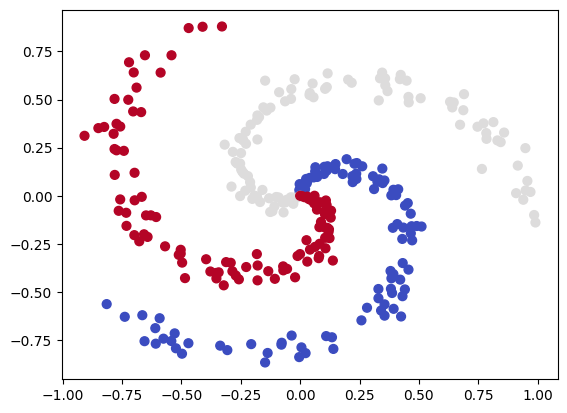

In [ ]:
data = Dataset()
data.plot

In [ ]:
class NeuralNet:
  def __init__(self, inFeatures, hiddenFeatures, numClasses) -> None:
    self.__hiddenFeatures = hiddenFeatures
    self.__numclass = numClasses
    self.w1 = np.random.rand(inFeatures, hiddenFeatures)
    self.w2 = np.random.rand(hiddenFeatures, numClasses)

  def forward(self, x):
    self.__z = np.matmul(self.w1.T, x)
    self.__a = self.__sigmoid(self.__z)
    self.__s = np.matmul(self.w2.T, self.__a)
    self.__probs = self.__softmax(self.__s)
    return self.__s, self.__probs

  def __softmax(self, x):
        a = np.exp(x)
        return a/a.sum()

  def __sigmoid(self, x):
      return 1/(1+np.exp(-x))

  # dw1 <- dw2 <- cost(y')
  def backward(self, x, y):
    self.__probs[y] -= 1
    diag2 = np.diag(self.__probs.ravel())
    dw2 = np.matmul(self.__a, np.ones((1, self.__numclass)))
    dw2 = np.matmul(dw2, diag2)

    a = self.__sigmoid(self.__z)
    d = np.matmul(self.w2, self.__probs) * (a * (1 - a))
    diag1 = np.diag(d.ravel())
    dw1 = np.matmul(x, np.ones((1, self.__hiddenFeatures)))
    dw1 = np.matmul(dw1, diag1)
    return dw1, dw2

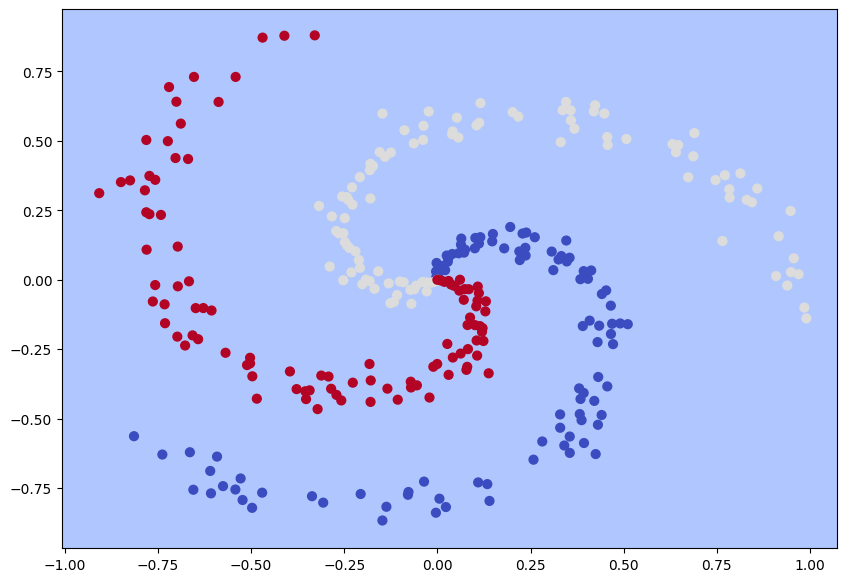

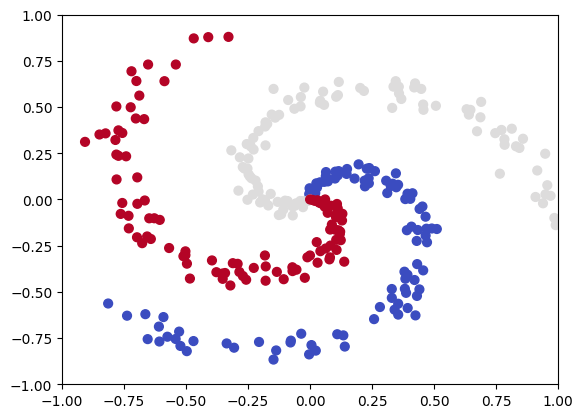

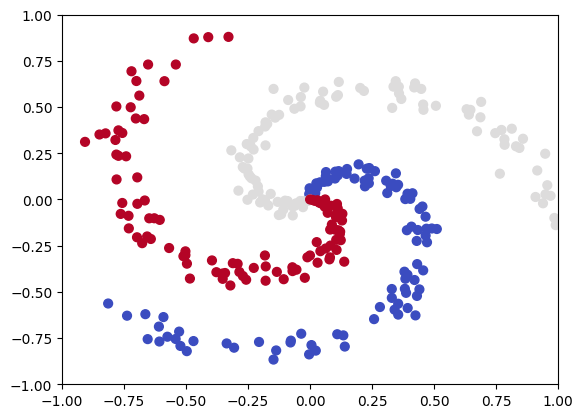

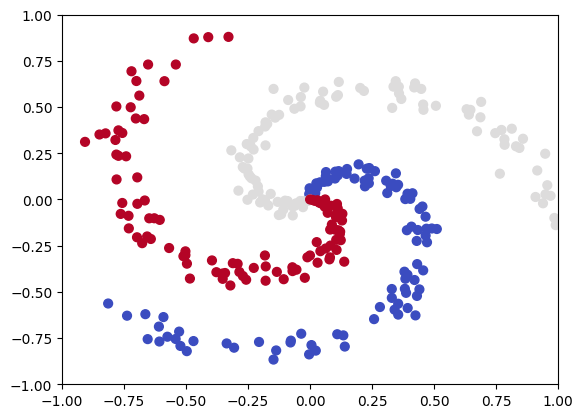

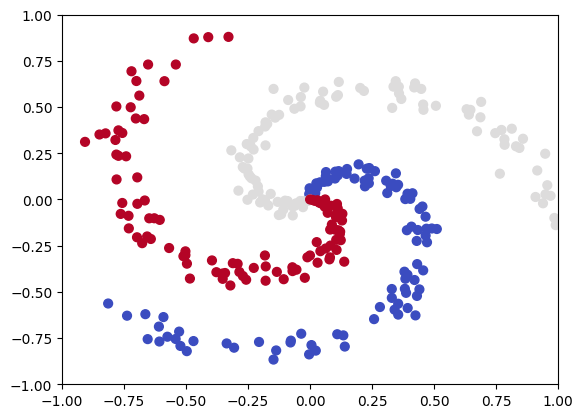

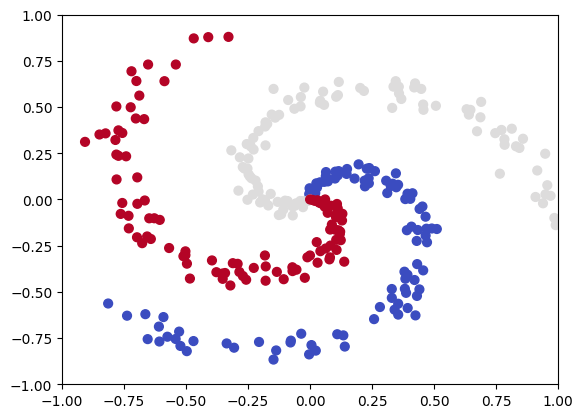

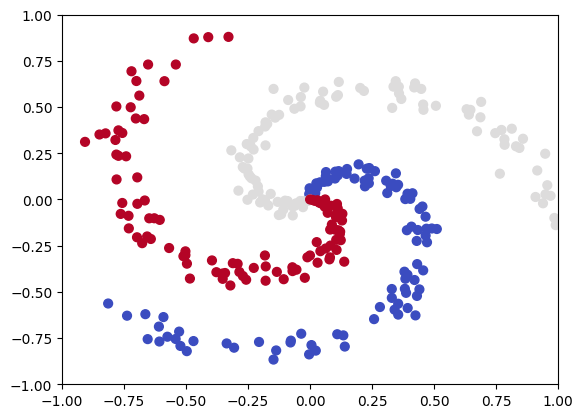

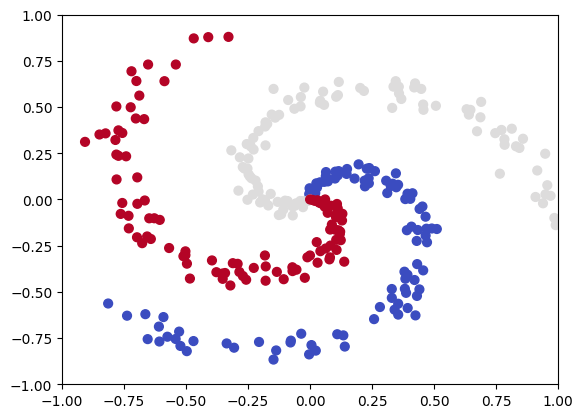

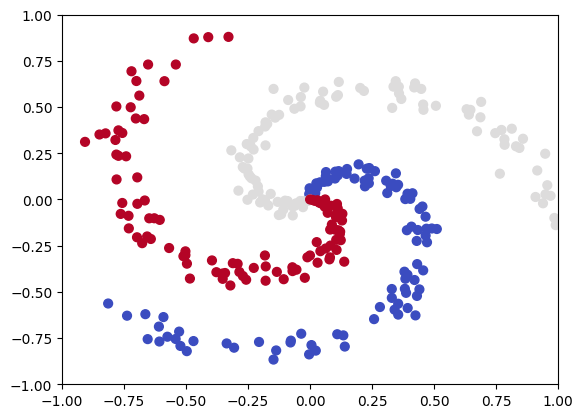

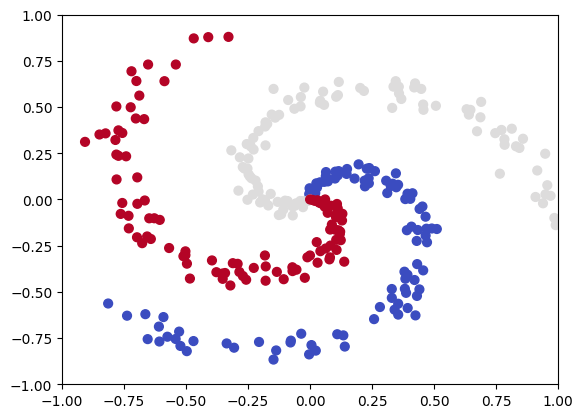

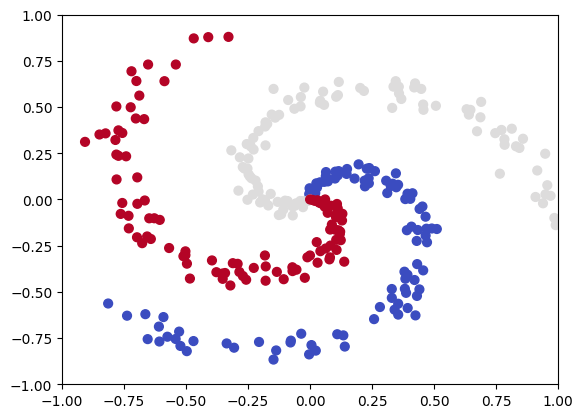

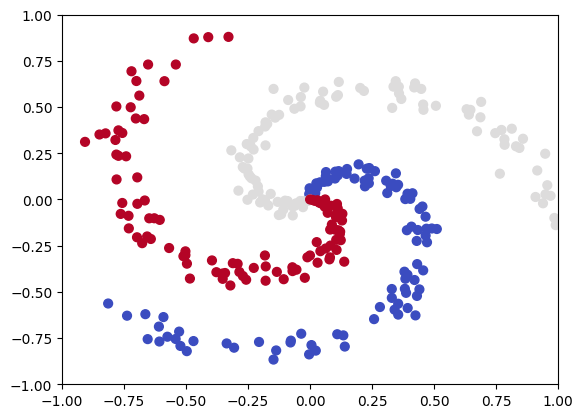

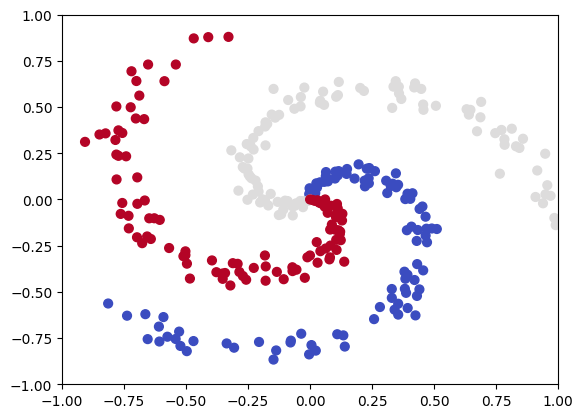

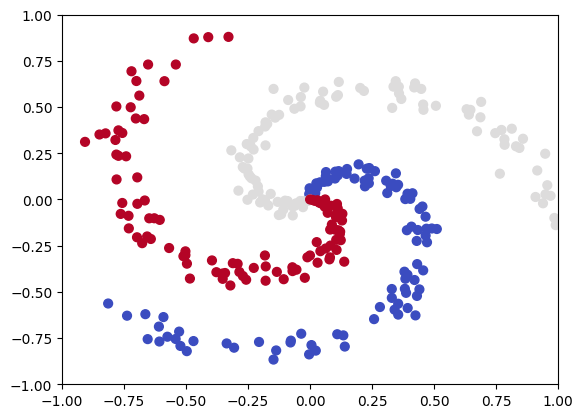

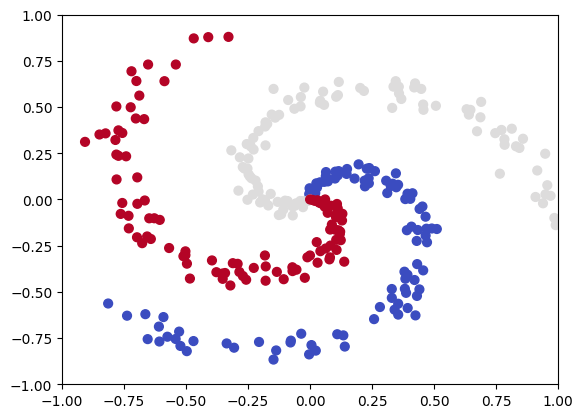

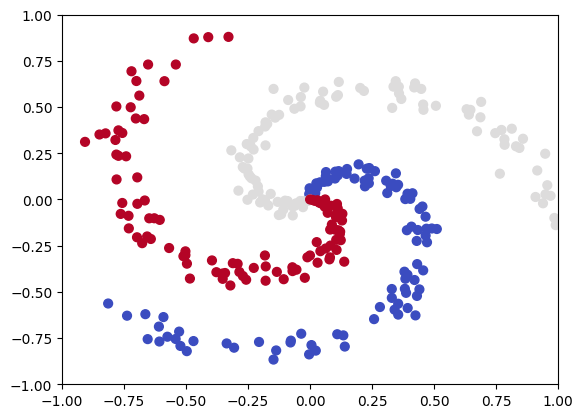

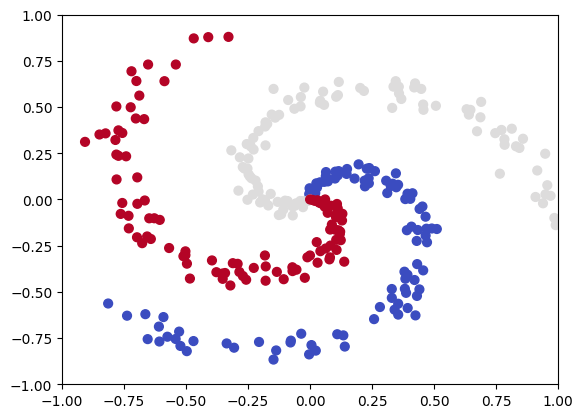

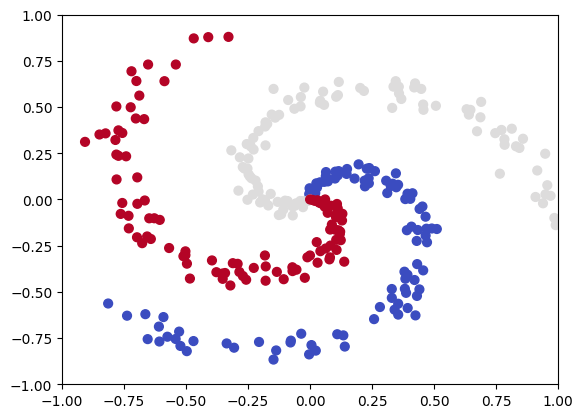

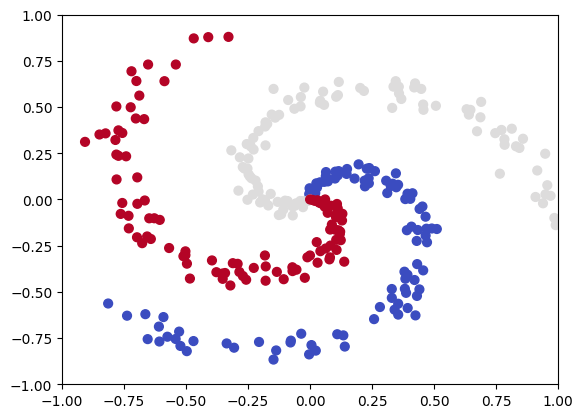

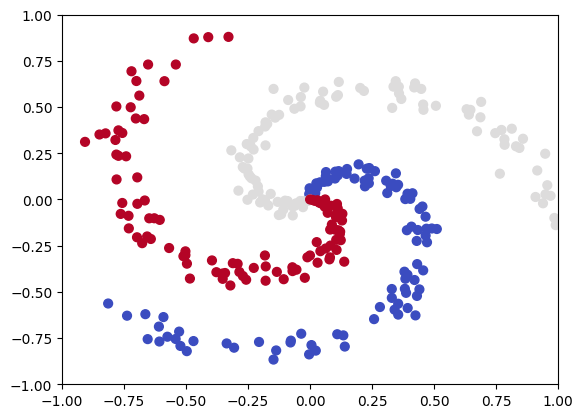

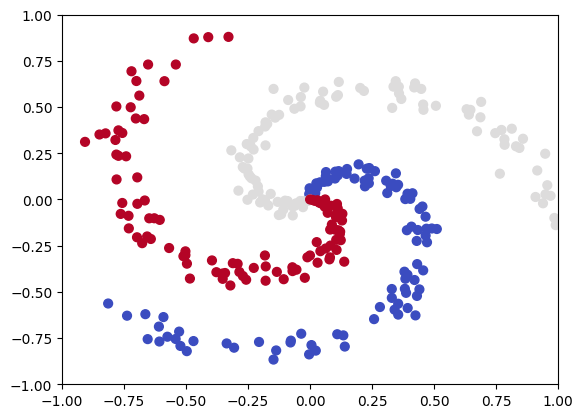

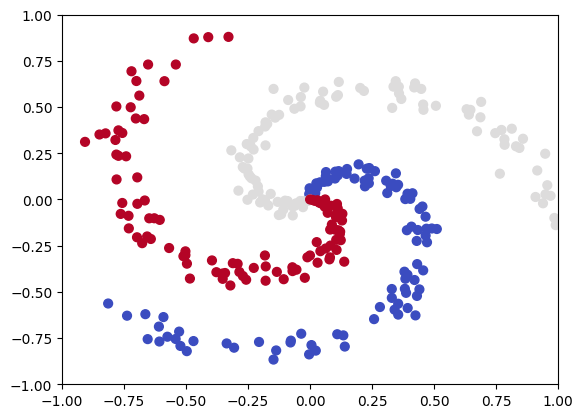

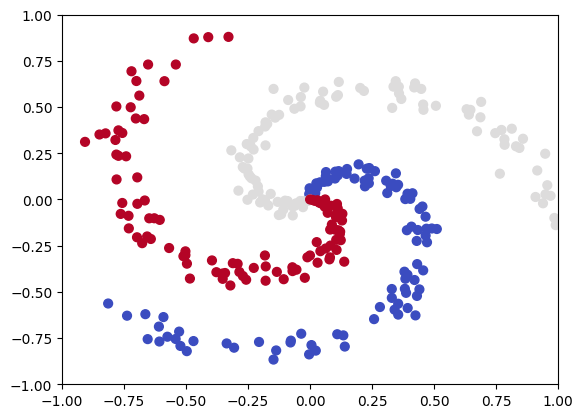

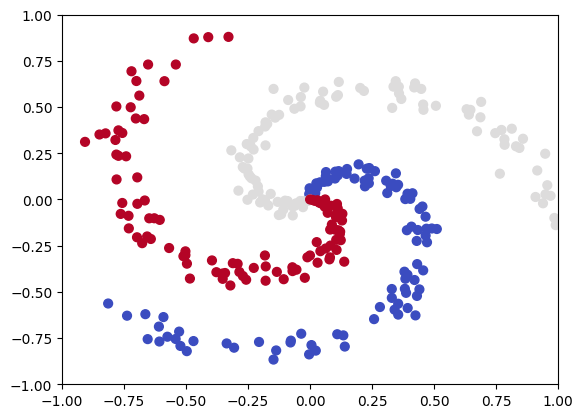

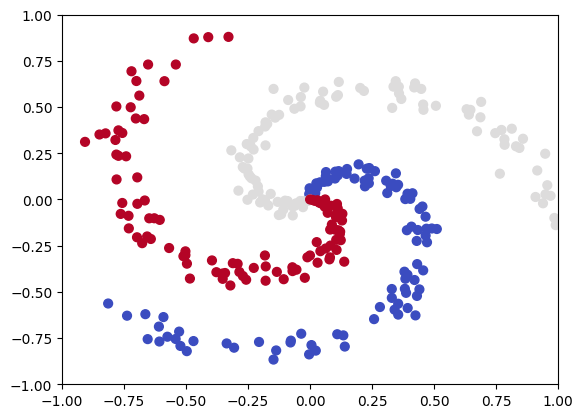

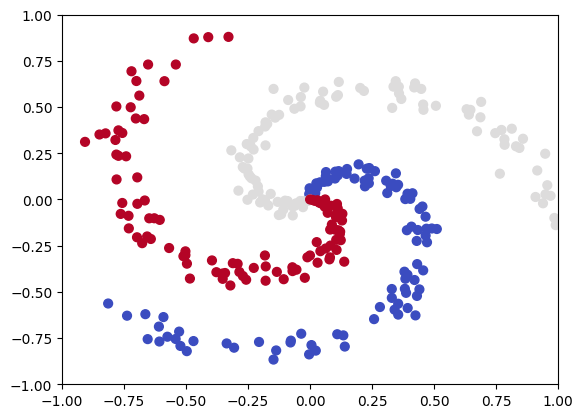

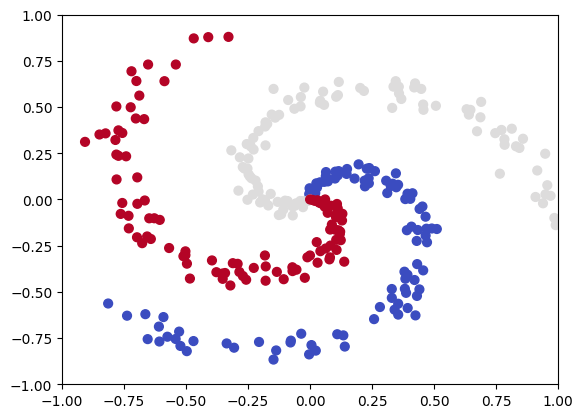

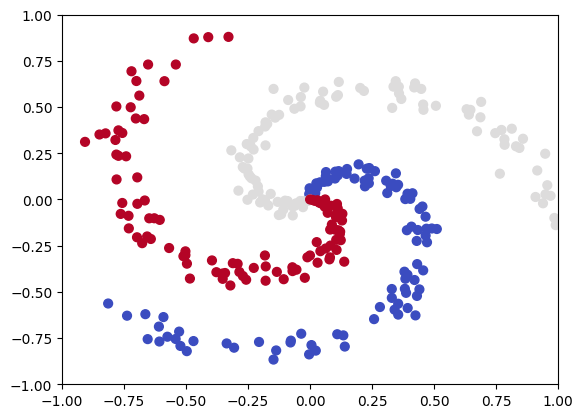

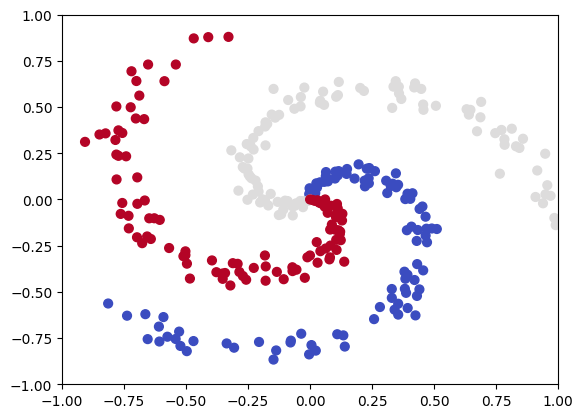

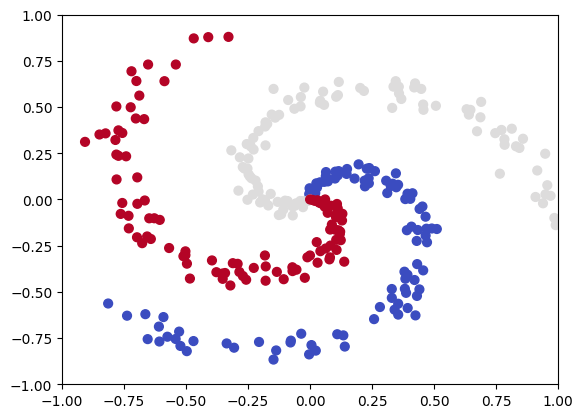

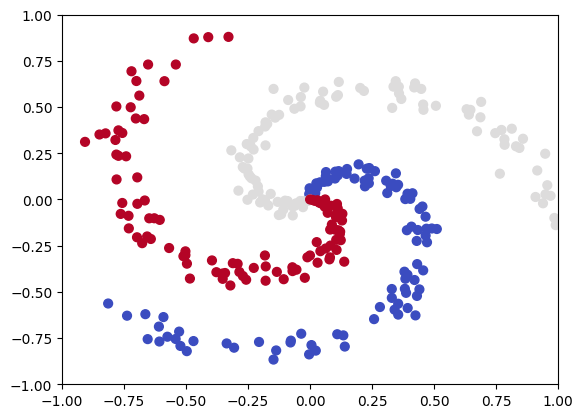

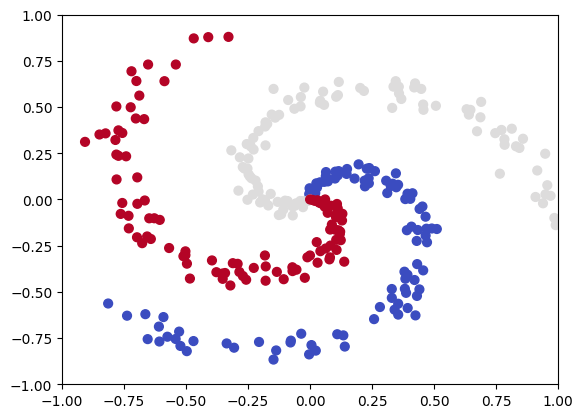

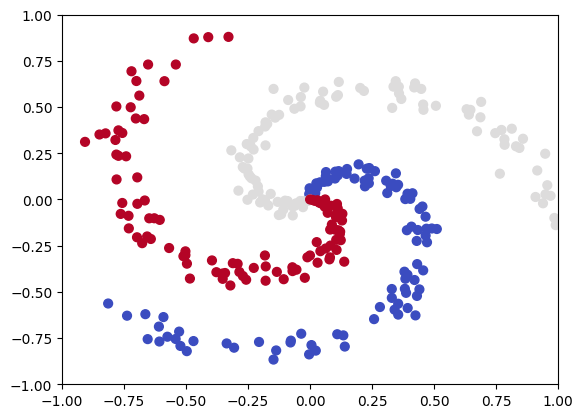

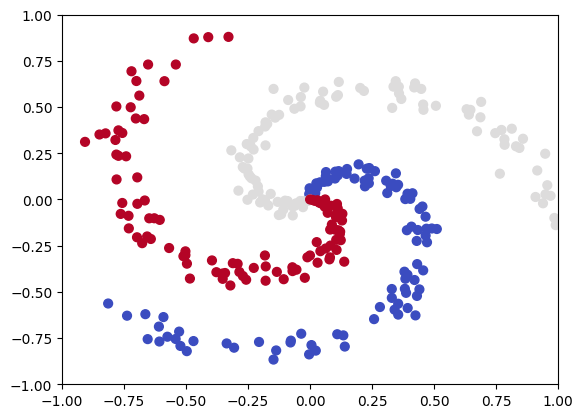

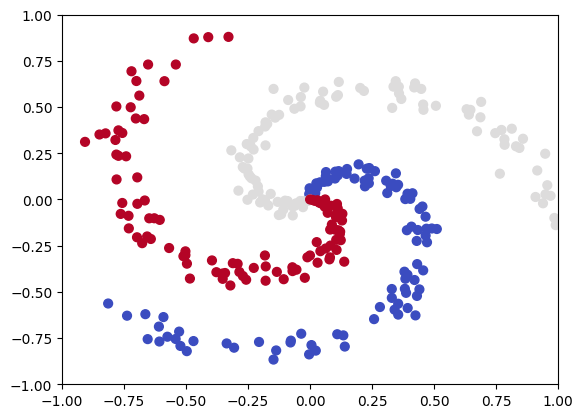

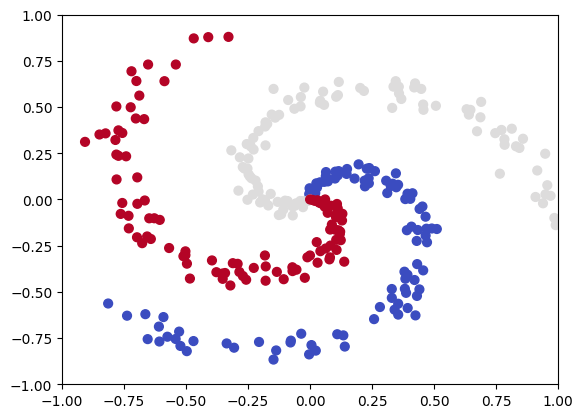

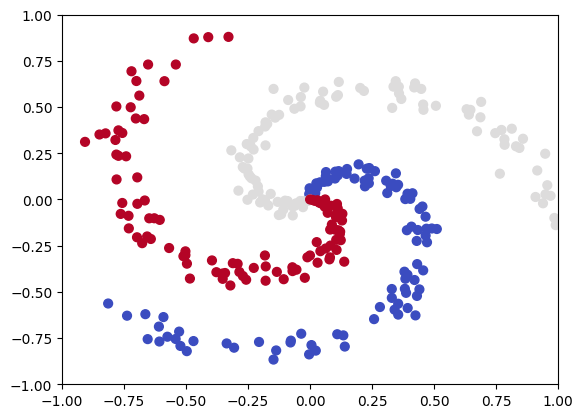

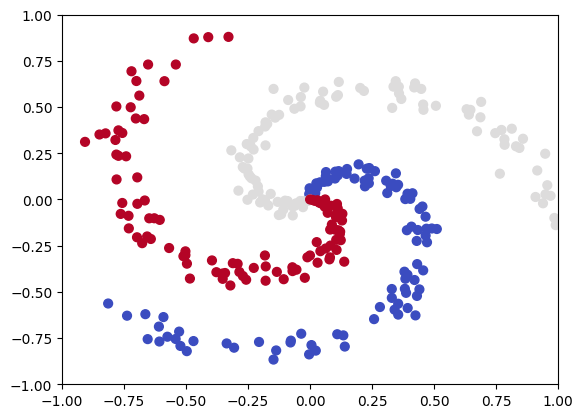

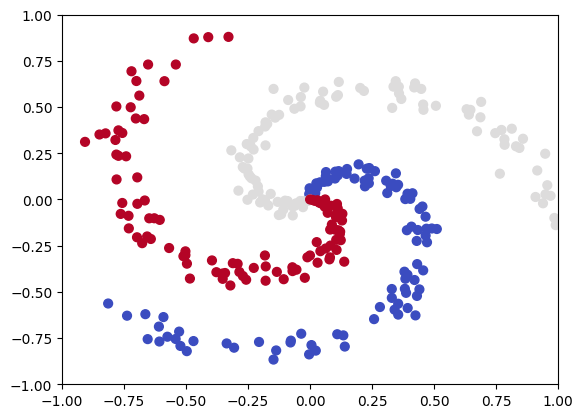

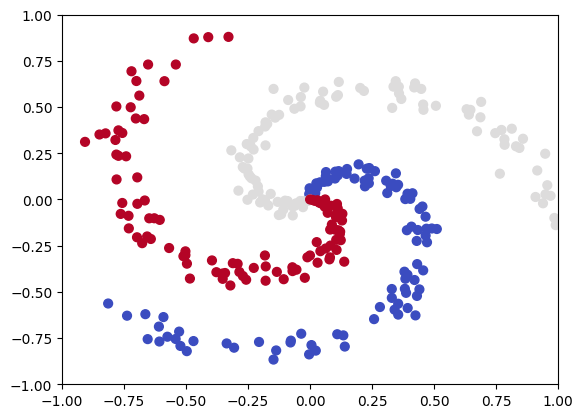

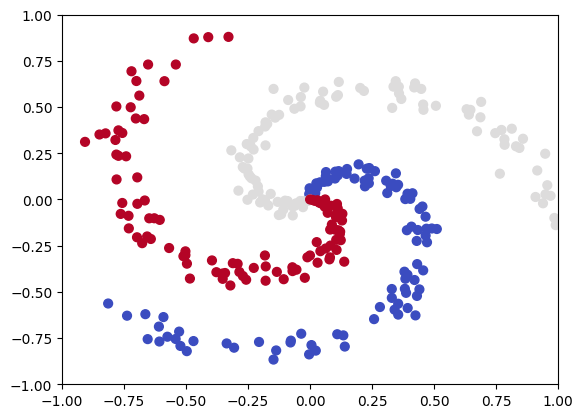

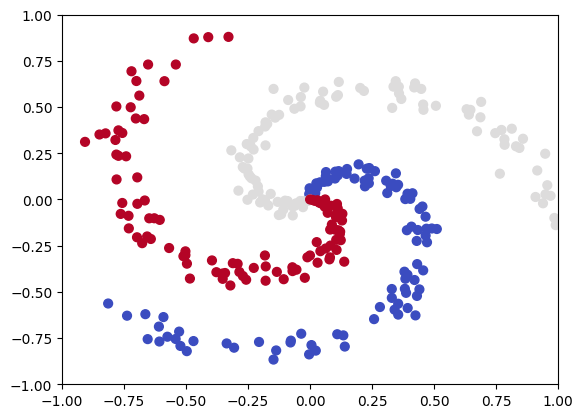

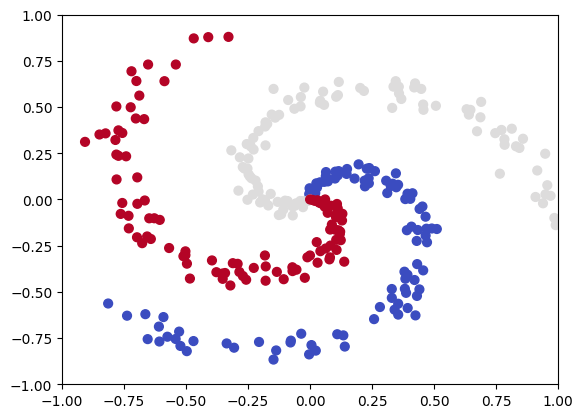

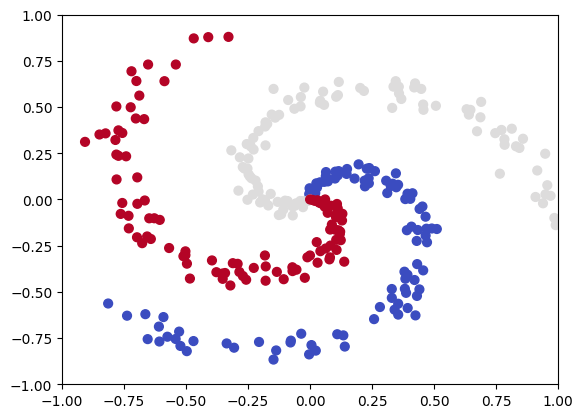

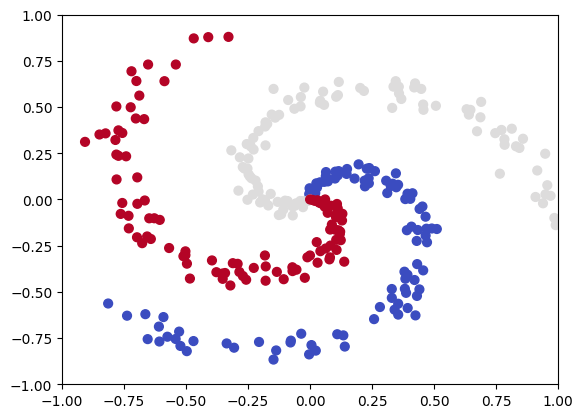

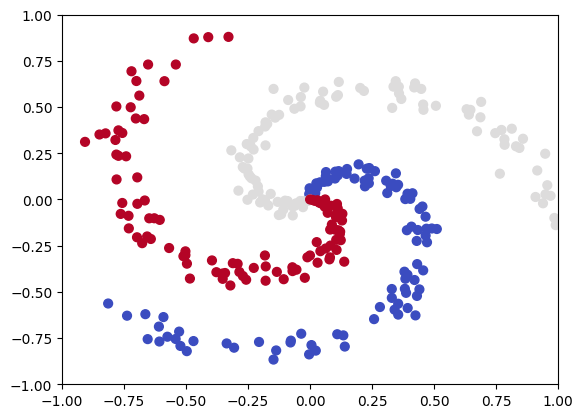

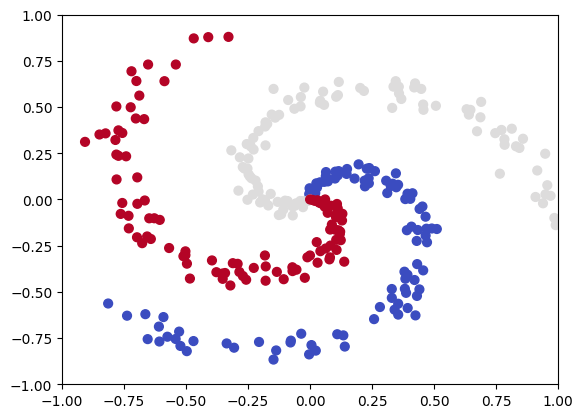

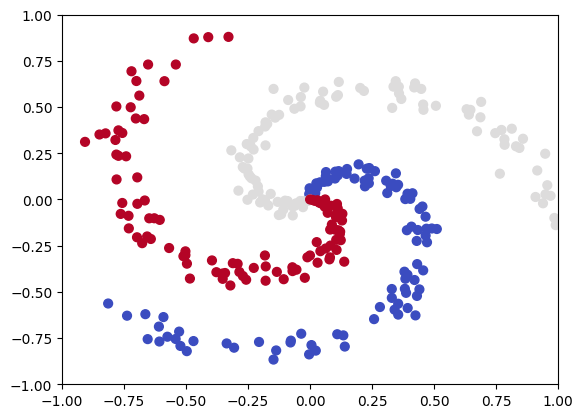

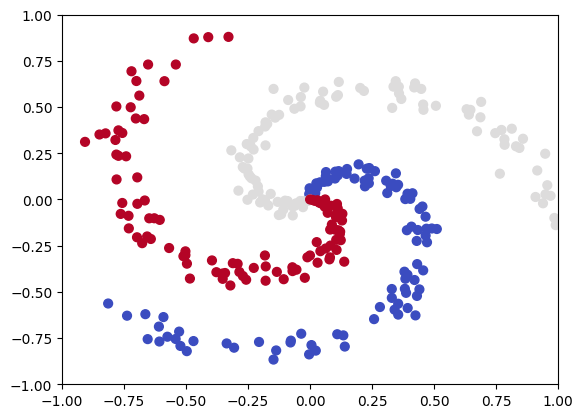

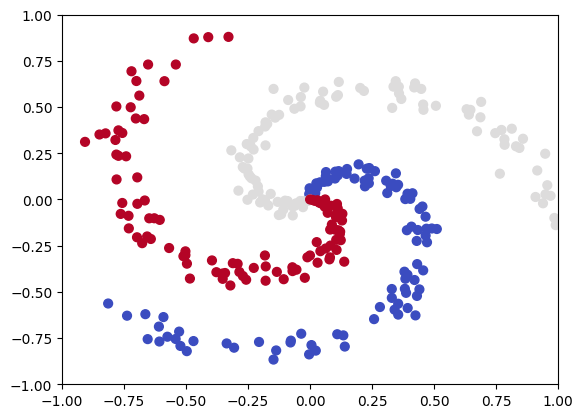

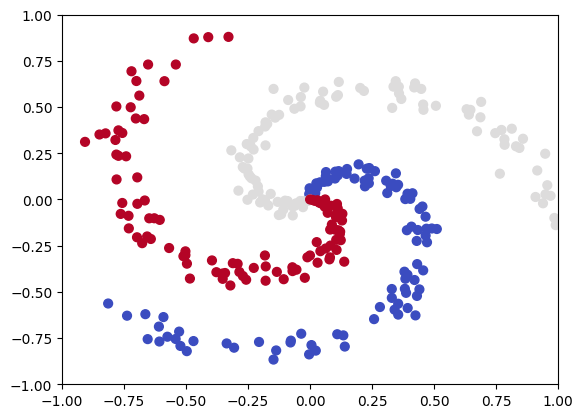

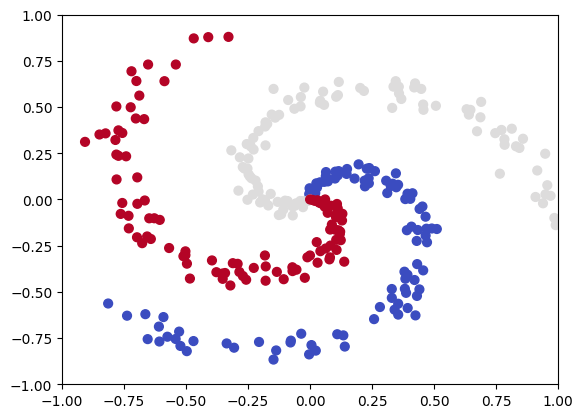

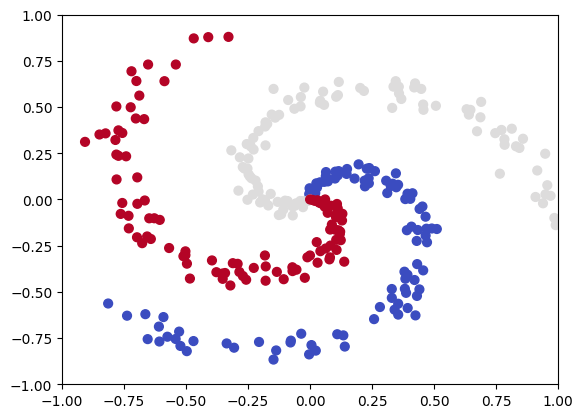

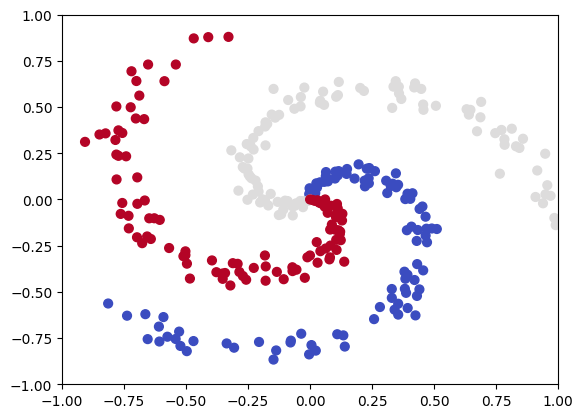

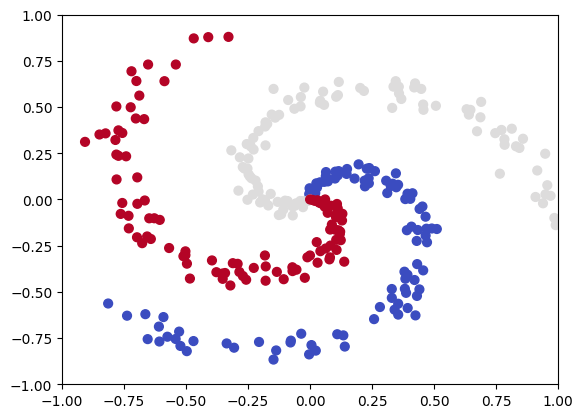

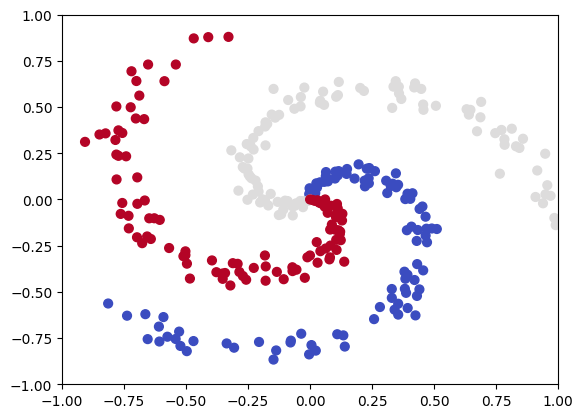

In [ ]:
from tqdm import tqdm

np.random.seed(0)
h = .02
x_min, x_max = data.x[:, 0].min() - 0.1, data.x[:, 0].max() + 0.1
y_min, y_max = data.x[:, 1].min() - 0.1, data.x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig,ax = plt.subplots(figsize=(10,7))

model = NeuralNet(inFeatures=2,hiddenFeatures=15,numClasses=3)

LEARNING_RATE = 0.1
LOSS = []
def train(__):
    loss = 0
    for x,y in data:
        x = x.reshape((len(x),1))
        scores,p = model.forward(x)
        loss += -np.log(p[y])

        dw1,dw2 = model.backward(x,y)
        model.w1 -= LEARNING_RATE*dw1
        model.w2 -= LEARNING_RATE*dw2

    LOSS.append(loss/len(data))

    z,_ = model.forward(np.c_[xx.ravel(),yy.ravel()].T)
    z = np.argmax(z,axis=0)
    z = z.reshape(xx.shape)
    ax.clear()
    ax.contourf(xx,yy,z,alpha=0.7,cmap=plt.cm.coolwarm)
    data.plot
    plt.xlim([-1,1])
    plt.ylim([-1,1])

plots = animate(fig,train,frames=600,interval=60,repeat=False)
plots